In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 200)

In [3]:
new_application = pd.read_csv('application_data.csv',error_bad_lines = False)
previous_application = pd.read_csv('previous_application.csv',error_bad_lines = False)

### Data info of New Application

In [4]:
new_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
new_application.shape

(307511, 122)

In [6]:
new_application.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
new_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


### Data Info of Previous Application

In [8]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
previous_application.shape

(1670214, 37)

In [10]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [11]:
previous_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


## Time to Handle Missing Values

#### 1. Application Data

I used this heatmap order to check all the missing value in our dataset.

<AxesSubplot:>

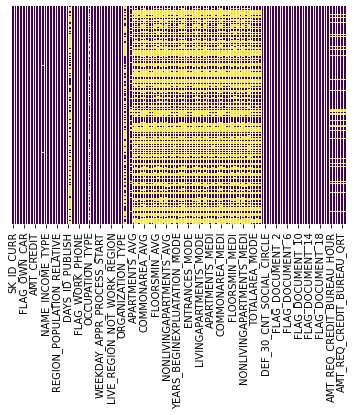

In [12]:
sns.heatmap(new_application.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### Dropping columns where missing values are greater than 20

In [13]:
new_application = new_application.loc[:, new_application.isnull().mean() <= .19]

<AxesSubplot:>

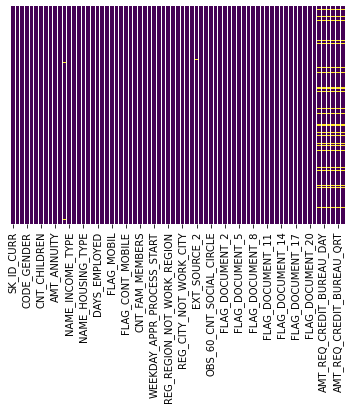

In [14]:
sns.heatmap(new_application.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#Checking the data 
(new_application.isnull().sum()*100/len(new_application)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

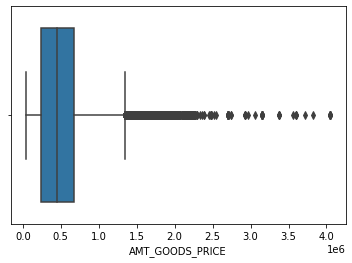

In [16]:
sns.boxplot(new_application['AMT_GOODS_PRICE'])
plt.show()

In [17]:
#Missing values in AMT_GOODS_PRICE could be imputed by median value for this var since this is a continuous float var
Median = round(new_application['AMT_GOODS_PRICE'].median(),2)
new_application['AMT_GOODS_PRICE'].fillna(Median, inplace=True)

In [18]:
new_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [19]:
imputVAL = new_application['NAME_TYPE_SUITE'].mode()
print(f'Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e {imputVAL[0]}')

Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e Unaccompanied


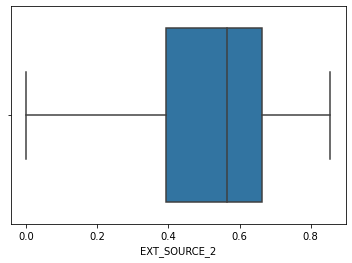

In [20]:
sns.boxplot(new_application['EXT_SOURCE_2'])
plt.show()

In [21]:
#Since No Outliers in EXT_SOURCE_2 , choose mean to impute column
Mean = round(new_application['EXT_SOURCE_2'].mean(),2)
new_application['EXT_SOURCE_2'].fillna(Mean, inplace=True)

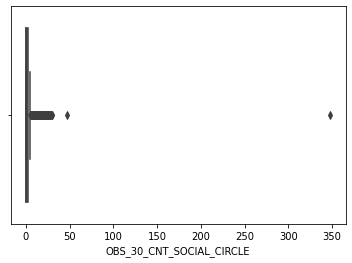

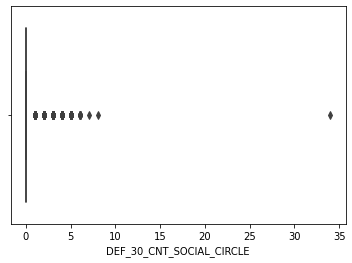

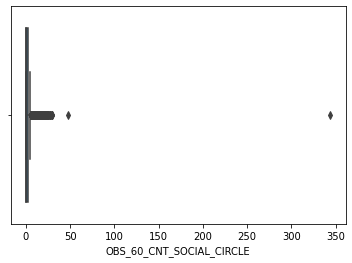

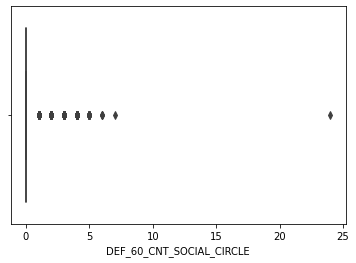

In [22]:
#Replacing all the missing values of AMT_REQ_CREDIT_BUREAU's with the mean value.
missing_value = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

for i in missing_value:
    sns.boxplot(new_application[i])
    plt.show()

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode, which is the value '0'

In [23]:
new_application.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [24]:
new_application.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT' with the mode, which is the value '0'. Since they all are number of credit inquiries, replacing missing values with the most frequent value would make more sense

In [25]:
new_application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= new_application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

In [26]:
#Checking the data again
(new_application.isnull().sum()*100/len(new_application)).round(2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

<AxesSubplot:>

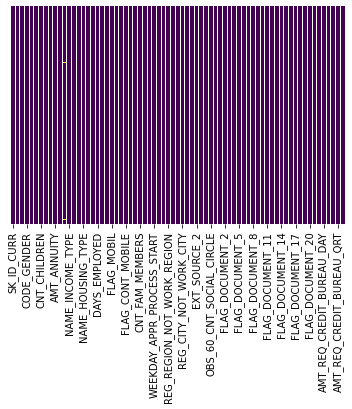

In [27]:
sns.heatmap(new_application.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Our Dataset looks much better now

## Handling Data Type of the columns

In [28]:
new_application.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [29]:
new_application.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [30]:
#Converting these count columns to int64
ColumnToConvert = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']
new_application.loc[:,ColumnToConvert]=new_application.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

##### Errors in Data types and Data i.e

Changing the 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' which had negative or mixed values with absolute values for our analysis

In [31]:
filter_col = [col for col in new_application if col.startswith('DAYS')]
new_application[filter_col]= abs(new_application[filter_col])

### Binning of continuous variables

In [32]:
new_application['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [33]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
new_application['AMT_INCOME_RANGE'] = pd.qcut(new_application.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
new_application['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [34]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
new_application['AMT_CREDIT_RANGE'] = pd.qcut(new_application.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
new_application['AMT_CREDIT_RANGE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [35]:
# Binning 'EXT_SOURCE_2' by creating various ranges
new_application['EXT_SOURCE_2'] = pd.qcut(new_application.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
new_application['EXT_SOURCE_2'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: EXT_SOURCE_2, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [36]:
# Converting 'DAYS_BIRTH' to years
new_application['DAYS_BIRTH']= (new_application['DAYS_BIRTH']/365).astype(int)
new_application['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [37]:
# Biining 'DAYS_BIRTH'
new_application['DAYS_BIRTH_BINS']=pd.cut(new_application['DAYS_BIRTH'], bins=[18,24,36,58,80], labels=['Young','Middle_Age', 'Old', 'Senior_Citizen'])
new_application['DAYS_BIRTH_BINS'].value_counts()

Old               164428
Middle_Age         88707
Senior_Citizen     42226
Young              12150
Name: DAYS_BIRTH_BINS, dtype: int64

## Checking for imbalance in Target

In [38]:
new_application['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

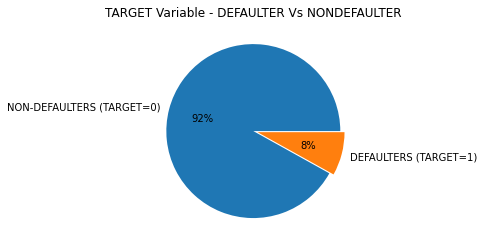

In [39]:
plt.pie(new_application['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

The imbalance is high between target variables i.e  More than 92% of people didn't default as opposed to 8% who defaulted.

### Splitting Data w.r.t TARGET=0 and TARGET=1

In [40]:
# Dividing the original dataset into two different datasets depending upon the target value
target_0 = new_application.loc[new_application.TARGET == 0]
target_1 = new_application.loc[new_application.TARGET == 1]

### Univariate Analysis of Categorical Variables

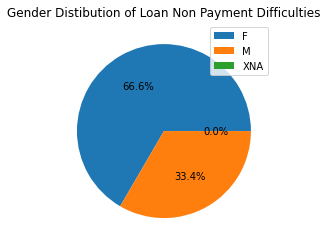

In [41]:
# Gender Distibution of Loan Non-Payment Difficulties
plt.pie(target_0["CODE_GENDER"].value_counts(),autopct='%1.1f%%')
plt.title('Gender Distibution of Loan Non Payment Difficulties')
plt.legend(labels=target_0["CODE_GENDER"].value_counts().index, loc="best")
plt.show()


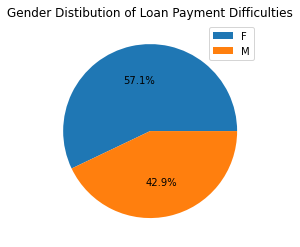

In [42]:
# Gender Distibution of Loan Payment Difficulties
plt.pie(target_1["CODE_GENDER"].value_counts(),autopct='%1.1f%%')
plt.title('Gender Distibution of Loan Payment Difficulties')
plt.legend(labels=target_1["CODE_GENDER"].value_counts().index, loc="best")
plt.show()

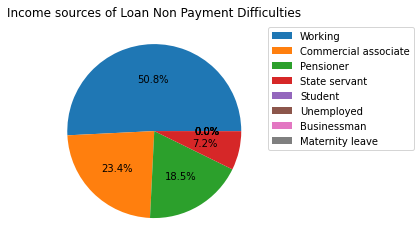

In [43]:
# Income sources of Loan Non Payment Difficulties
plt.pie(target_0["NAME_INCOME_TYPE"].value_counts(),autopct='%1.1f%%')
plt.title('Income sources of Loan Non Payment Difficulties')
plt.legend(labels=target_0["NAME_INCOME_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

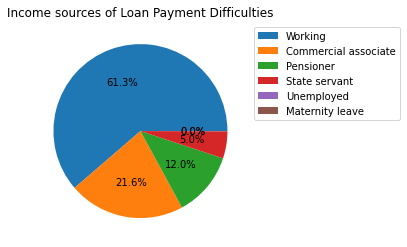

In [44]:
# Income sources of Loan Payment Difficulties
plt.pie(target_1["NAME_INCOME_TYPE"].value_counts(),autopct='%1.1f%%')
plt.title('Income sources of Loan Payment Difficulties')
plt.legend(labels=target_1["NAME_INCOME_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

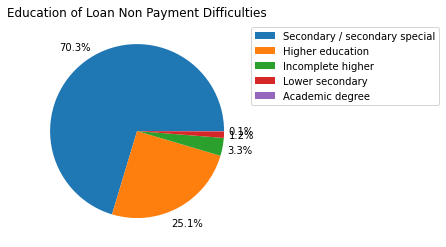

In [45]:
# Education of Loan Non Payment Difficulties
plt.pie(target_0["NAME_EDUCATION_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Education of Loan Non Payment Difficulties')
plt.legend(labels=target_0["NAME_EDUCATION_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

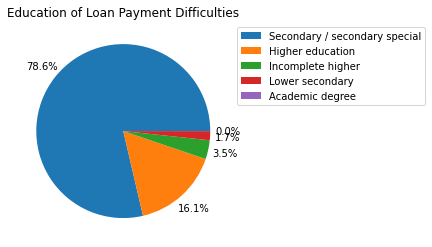

In [46]:
# Education of Loan Payment Difficulties
plt.pie(target_1["NAME_EDUCATION_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Education of Loan Payment Difficulties')
plt.legend(labels=target_1["NAME_EDUCATION_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

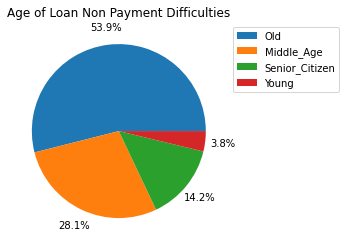

In [47]:
# Age of Loan Non Payment Difficulties
plt.pie(target_0["DAYS_BIRTH_BINS"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Age of Loan Non Payment Difficulties')
plt.legend(labels=target_0["DAYS_BIRTH_BINS"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

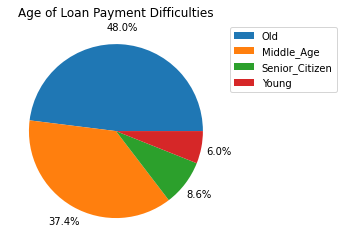

In [48]:
# Age of Loan Payment Difficulties
plt.pie(target_1["DAYS_BIRTH_BINS"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Age of Loan Payment Difficulties')
plt.legend(labels=target_1["DAYS_BIRTH_BINS"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

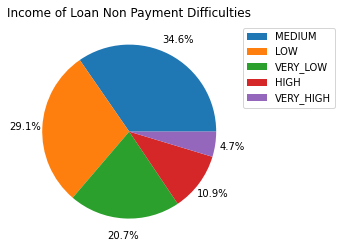

In [49]:
# Income of Loan Non Payment Difficulties
plt.pie(target_0["AMT_INCOME_RANGE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Income of Loan Non Payment Difficulties')
plt.legend(labels=target_0["AMT_INCOME_RANGE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

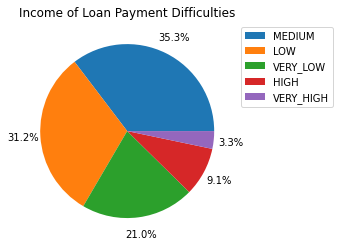

In [50]:
# Income of Loan Payment Difficulties
plt.pie(target_1["AMT_INCOME_RANGE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Income of Loan Payment Difficulties')
plt.legend(labels=target_1["AMT_INCOME_RANGE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

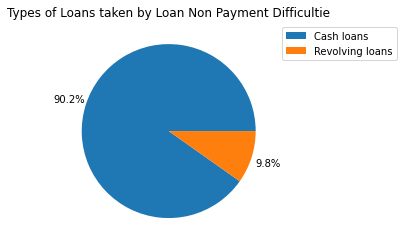

In [51]:
# Types of Loans taken by Loan Non Payment Difficulties 
plt.pie(target_0["NAME_CONTRACT_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Types of Loans taken by Loan Non Payment Difficultie')
plt.legend(labels=target_0["NAME_CONTRACT_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

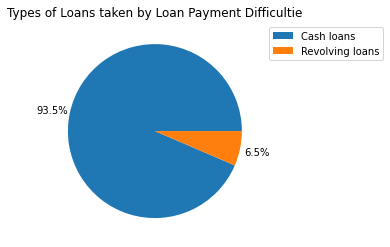

In [52]:
# Types of Loans taken by Loan Payment Difficulties 
plt.pie(target_1["NAME_CONTRACT_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Types of Loans taken by Loan Payment Difficultie')
plt.legend(labels=target_1["NAME_CONTRACT_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

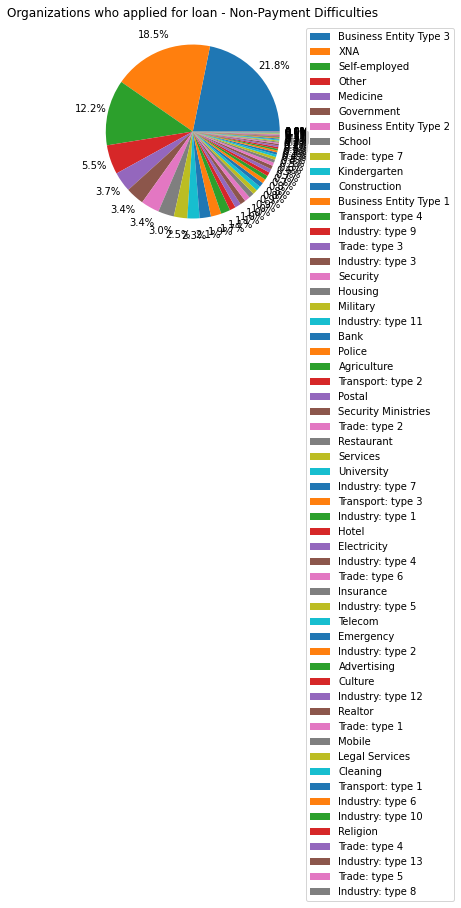

In [53]:
# Types of Organizations who applied for loan - Non-Payment Difficulties
plt.pie(target_0["ORGANIZATION_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Organizations who applied for loan - Non-Payment Difficulties')
plt.legend(labels=target_0["ORGANIZATION_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

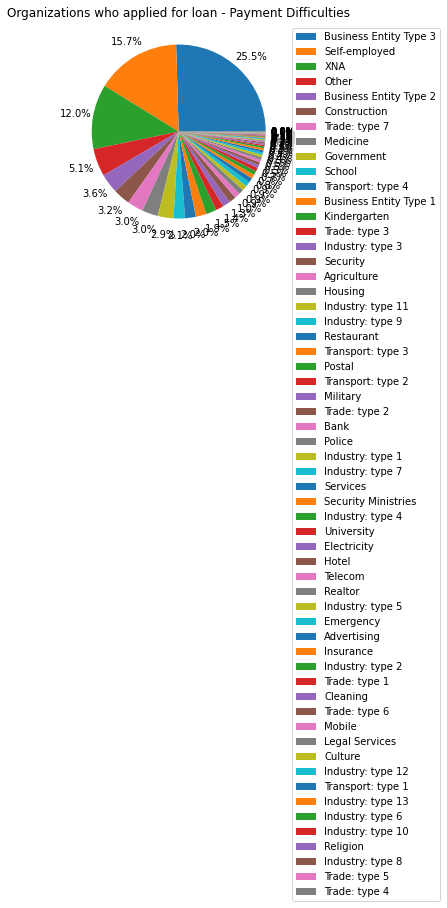

In [54]:
# Types of Organizations who applied for loan - Payment Difficulties
plt.pie(target_1["ORGANIZATION_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Organizations who applied for loan - Payment Difficulties')
plt.legend(labels=target_1["ORGANIZATION_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

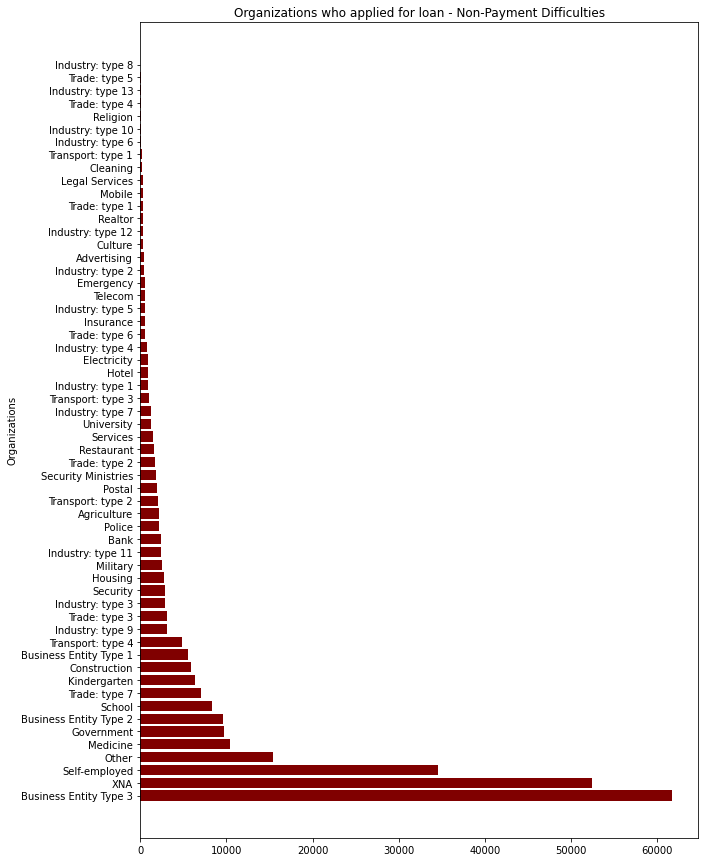

In [55]:
# Types of Organizations who applied for loan - Non-Payment Difficulties
from matplotlib.pyplot import figure
key = target_0['ORGANIZATION_TYPE'].value_counts().index
value = target_0['ORGANIZATION_TYPE'].value_counts().values
figure(num=None,figsize=(10,15))
plt.barh(key, value, color ='maroon')
plt.ylabel('Organizations')
plt.title('Organizations who applied for loan - Non-Payment Difficulties')
plt.show()

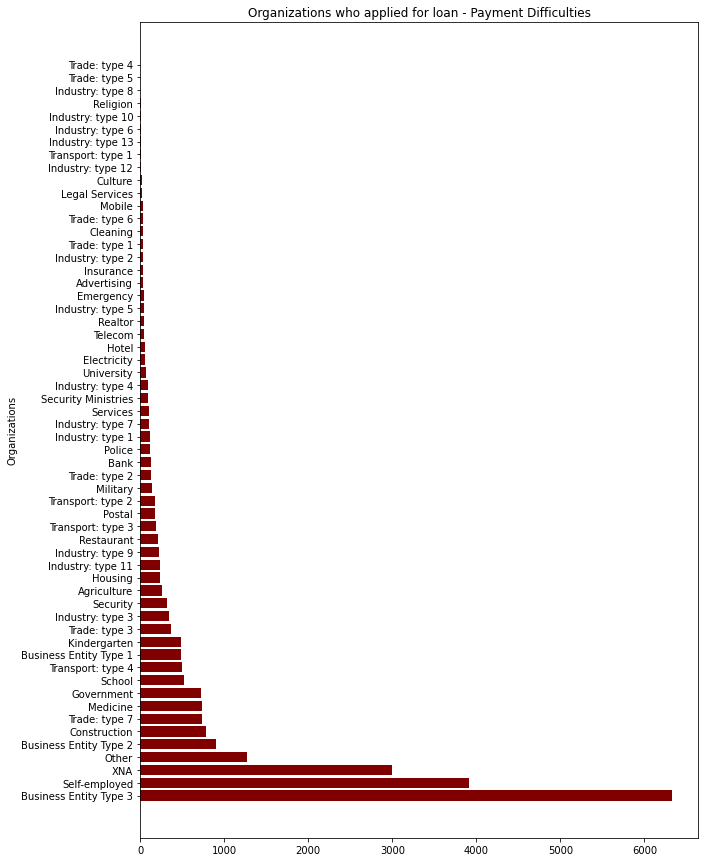

In [56]:
# Types of Organizations who applied for loan - Payment Difficulties
from matplotlib.pyplot import figure
key = target_1['ORGANIZATION_TYPE'].value_counts().index
value = target_1['ORGANIZATION_TYPE'].value_counts().values
figure(num=None,figsize=(10,15))
plt.barh(key, value, color ='maroon')
plt.ylabel('Organizations')
plt.title('Organizations who applied for loan - Payment Difficulties')
plt.show()

### Bivariate Analysis on continous plots

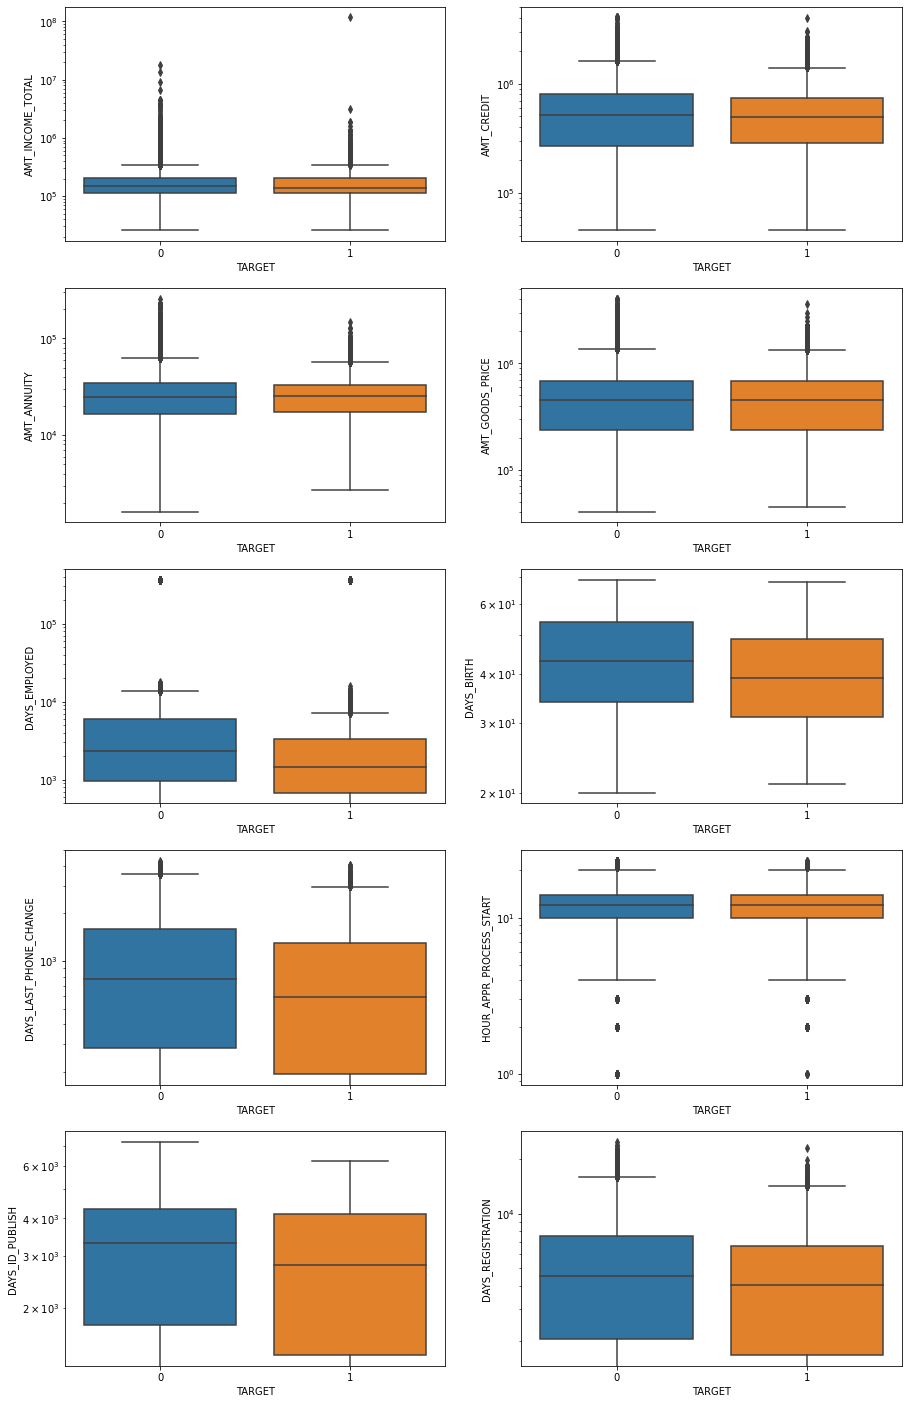

In [57]:
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=new_application[i[1]].dropna(),data=new_application)
    plt.yscale('log')
plt.show() 

### Bivariate Analysis of Numerical vs Numerical Variables

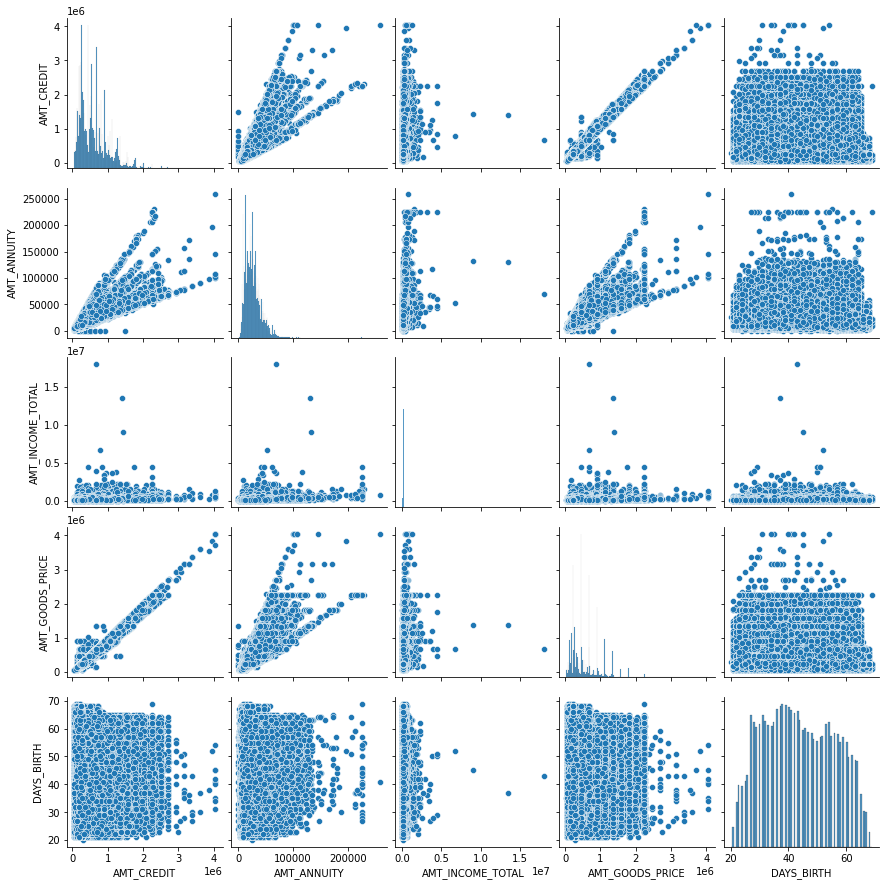

In [58]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

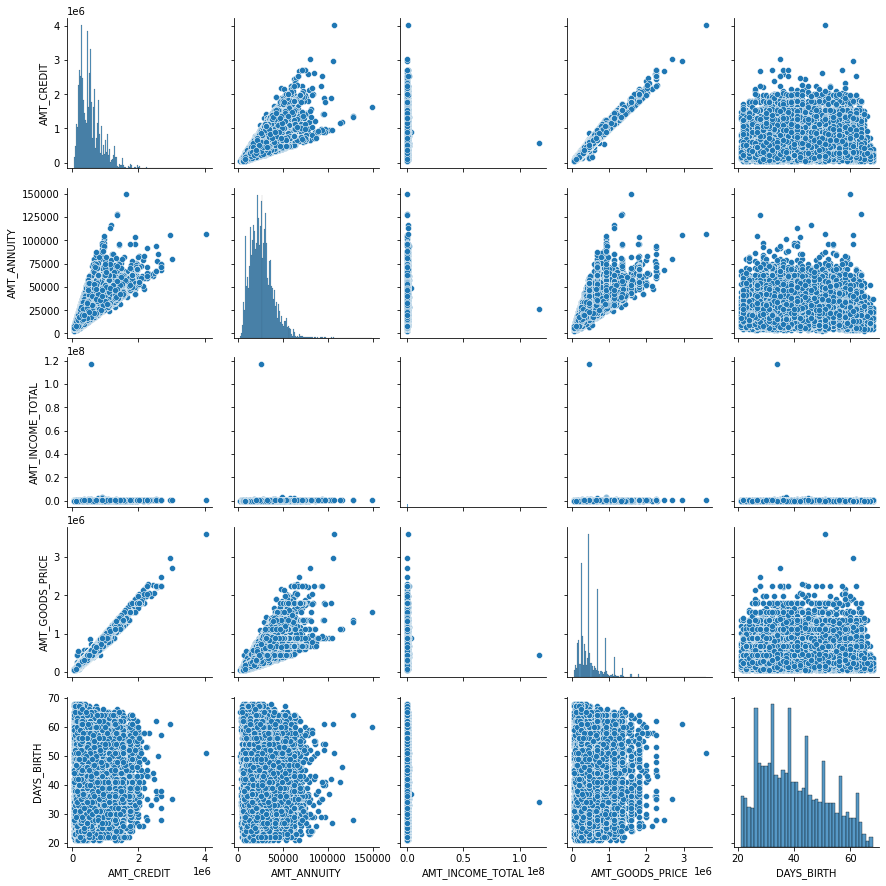

In [59]:
#Pairplot for Target 1 (Loan-Payment Difficulties)
pair = target_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

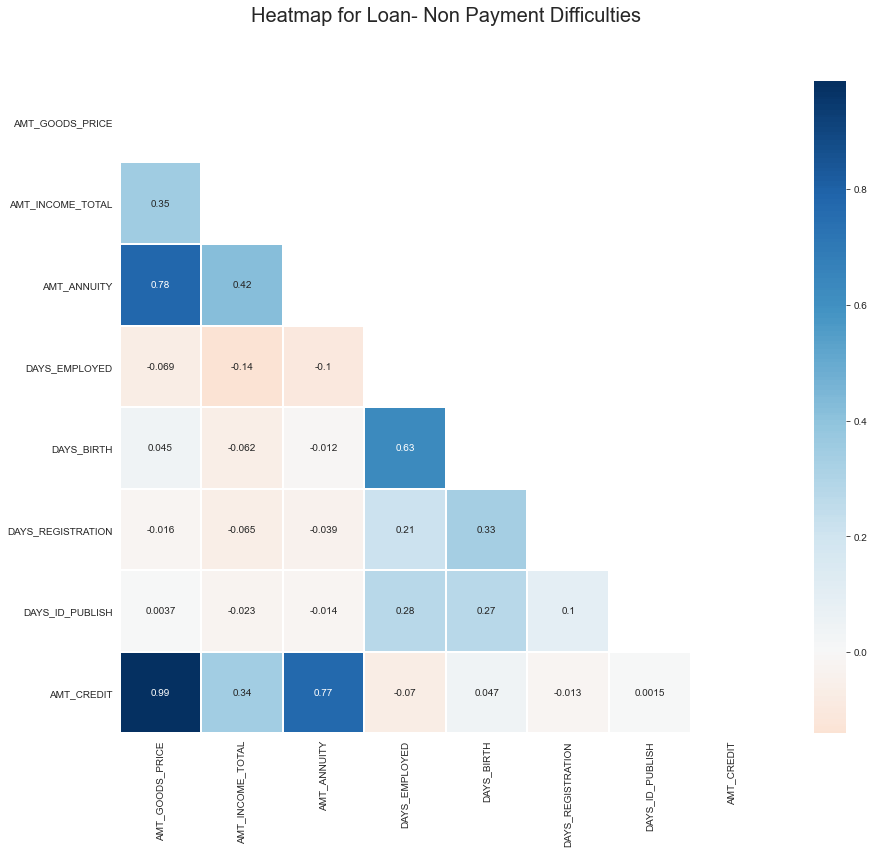

In [60]:
# Heatmap for Loan- Non Payment Difficulties
df = target_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]]
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Heatmap for Loan- Non Payment Difficulties", y = 1.03,fontsize = 20, pad = 40);

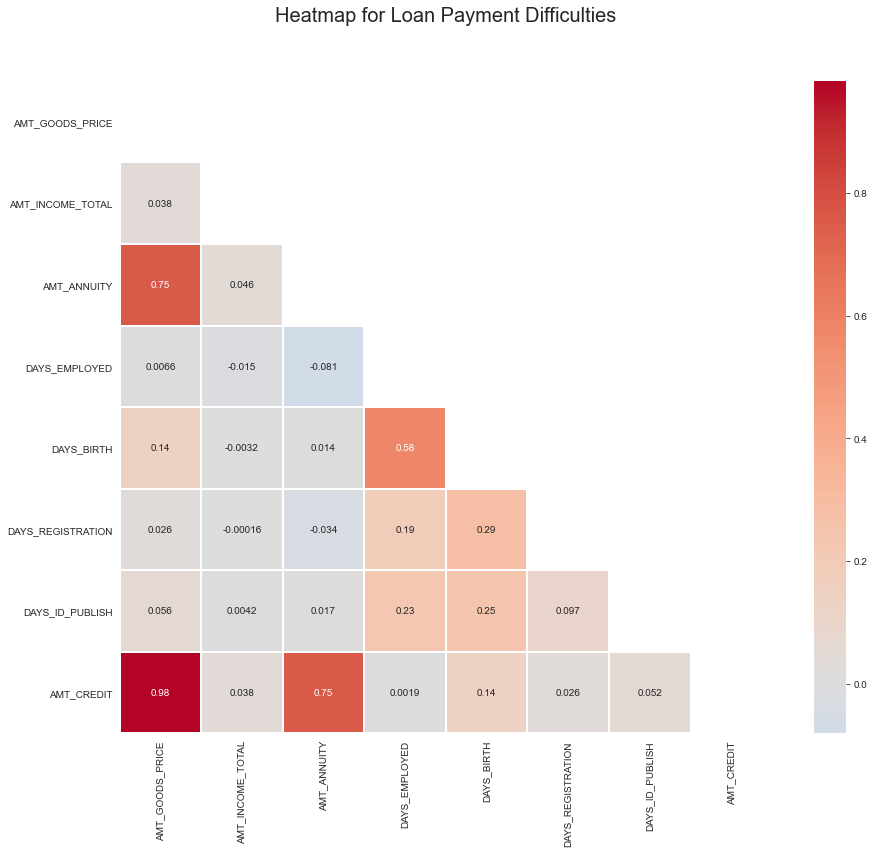

In [61]:
# Heatmap for Loan Payment Difficulties
df = target_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]]
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'coolwarm',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Heatmap for Loan Payment Difficulties", y = 1.03,fontsize = 20, pad = 40);

#### Top 10 Correlation : for target_0

In [62]:
corr=target_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
56,AMT_CREDIT,AMT_GOODS_PRICE,0.987022,0.987022
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.776433,0.776433
58,AMT_CREDIT,AMT_ANNUITY,0.771309,0.771309
35,DAYS_BIRTH,DAYS_EMPLOYED,0.626028,0.626028
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.349426,0.349426
57,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
44,DAYS_REGISTRATION,DAYS_BIRTH,0.333025,0.333025
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663,0.276663
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.270804,0.270804


#### Top 10 Correlation : for target_1

In [63]:
corr=target_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
56,AMT_CREDIT,AMT_GOODS_PRICE,0.982783,0.982783
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752295,0.752295
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582441,0.582441
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252256,0.252256
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.135532,0.135532
60,AMT_CREDIT,DAYS_BIRTH,0.135070,0.135070


### Data Analysis on Previous Application data

In [64]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
previous_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [66]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [67]:
round((100*previous_application.isnull().sum()/len(previous_application)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [68]:
# removing those columns which are having null percentage greater than 50
previous_application = previous_application.loc[:, previous_application.isnull().mean() <= 50]

In [69]:
# XNA and XAP are replaced by NaN
previous_application=previous_application.replace('XNA', np.NaN)
previous_application=previous_application.replace('XAP', np.NaN)

### Univariate Analysis on previous application data

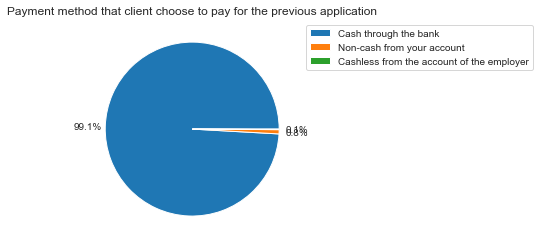

In [70]:
# Payment method that client choose to pay for the previous application
plt.pie(previous_application["NAME_PAYMENT_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Payment method that client choose to pay for the previous application')
plt.legend(labels=previous_application["NAME_PAYMENT_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

99% of the clients chose to pay cash through bank.

##### Reasons of previous application rejection

Text(0.5, 1.0, 'Reason of previous application rejection')

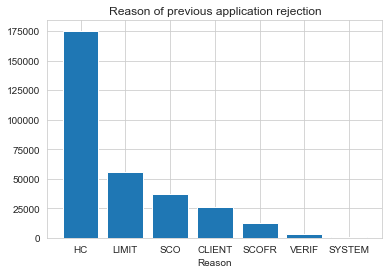

In [71]:
plt.bar(previous_application['CODE_REJECT_REASON'].value_counts().index,previous_application['CODE_REJECT_REASON'].value_counts().values)
plt.xlabel("Reason")
plt.title("Reason of previous application rejection")

HC is the reason majority of applications got rejetced.

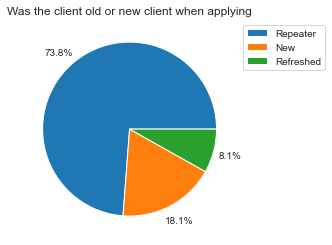

In [72]:
# Was the client old or new client when applying for the previous application
plt.pie(previous_application["NAME_CLIENT_TYPE"].value_counts(),autopct='%1.1f%%',pctdistance=1.2)
plt.title('Was the client old or new client when applying')
plt.legend(labels=previous_application["NAME_CLIENT_TYPE"].value_counts().index,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

majority of the clients are repeters

In [73]:
# converting -ve values to +ve
columns = ['DAYS_DECISION','SELLERPLACE_AREA','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','DAYS_FIRST_DRAWING']
for i in columns:
    previous_application[i] = previous_application[i].abs()

#### Checking the correlation in the PreviousApplication dataset

In [74]:
#Getting the top 10 correlation PreviousApplication
corr=previous_application.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
129,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
130,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
87,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
417,DAYS_TERMINATION,DAYS_LAST_DUE,0.927777,0.927777
128,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
86,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
65,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
372,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803504,0.803504
297,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
298,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


### Using pairplot to perform bivariate analysis on numerical columns

<Figure size 1440x576 with 0 Axes>

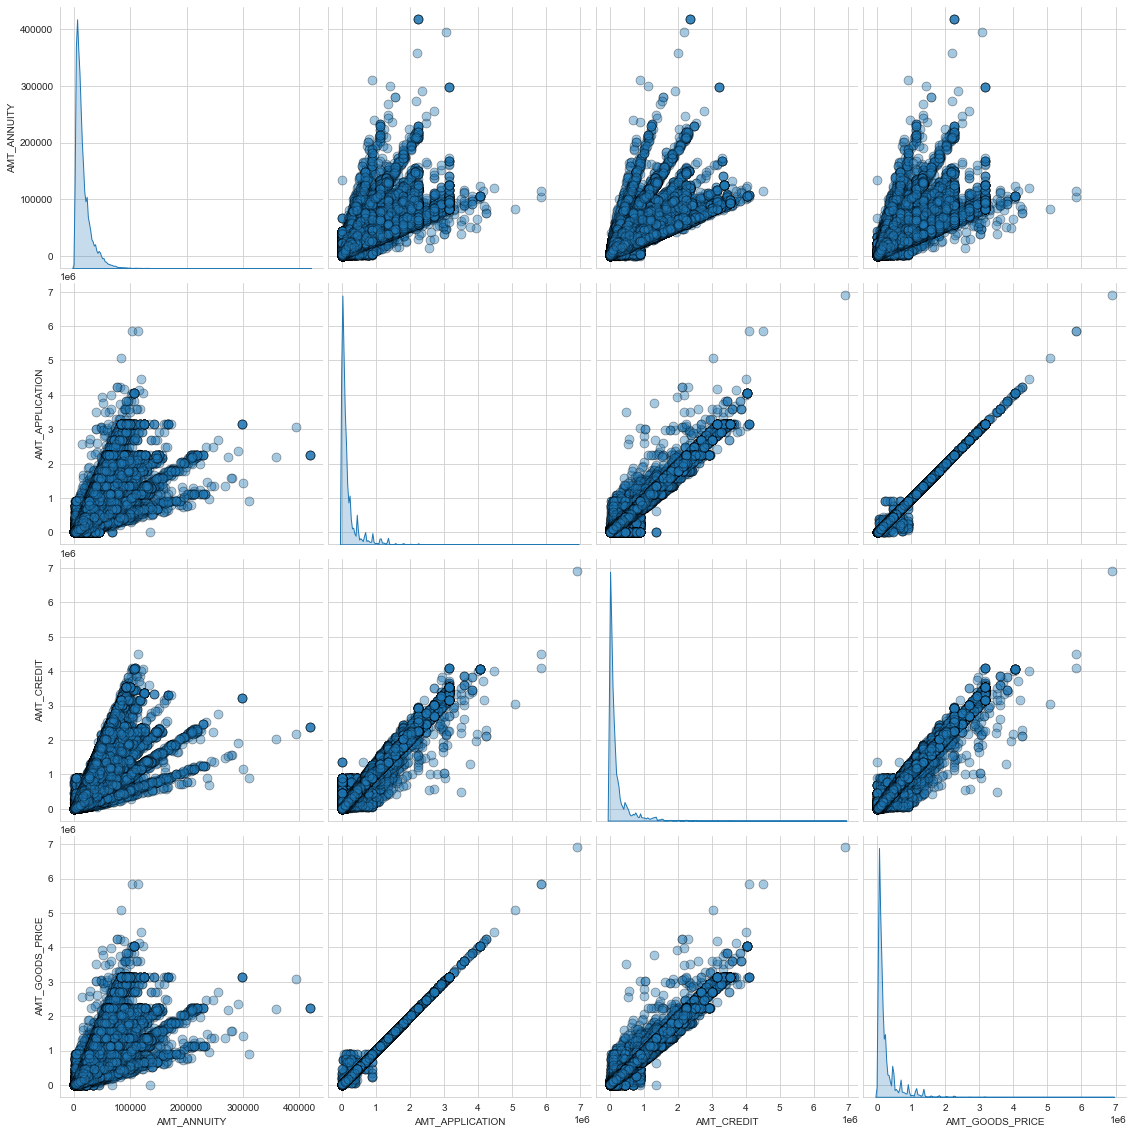

In [75]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(previous_application[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

###### Merging application data and previous application data by left join we get historical application data for each applicant.


###### Note:Current data will get duplicated the exact number of times it is found in previous application data.

In [76]:
merged_df=pd.merge(new_application,previous_application,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))

### Univariate Categorical analysis

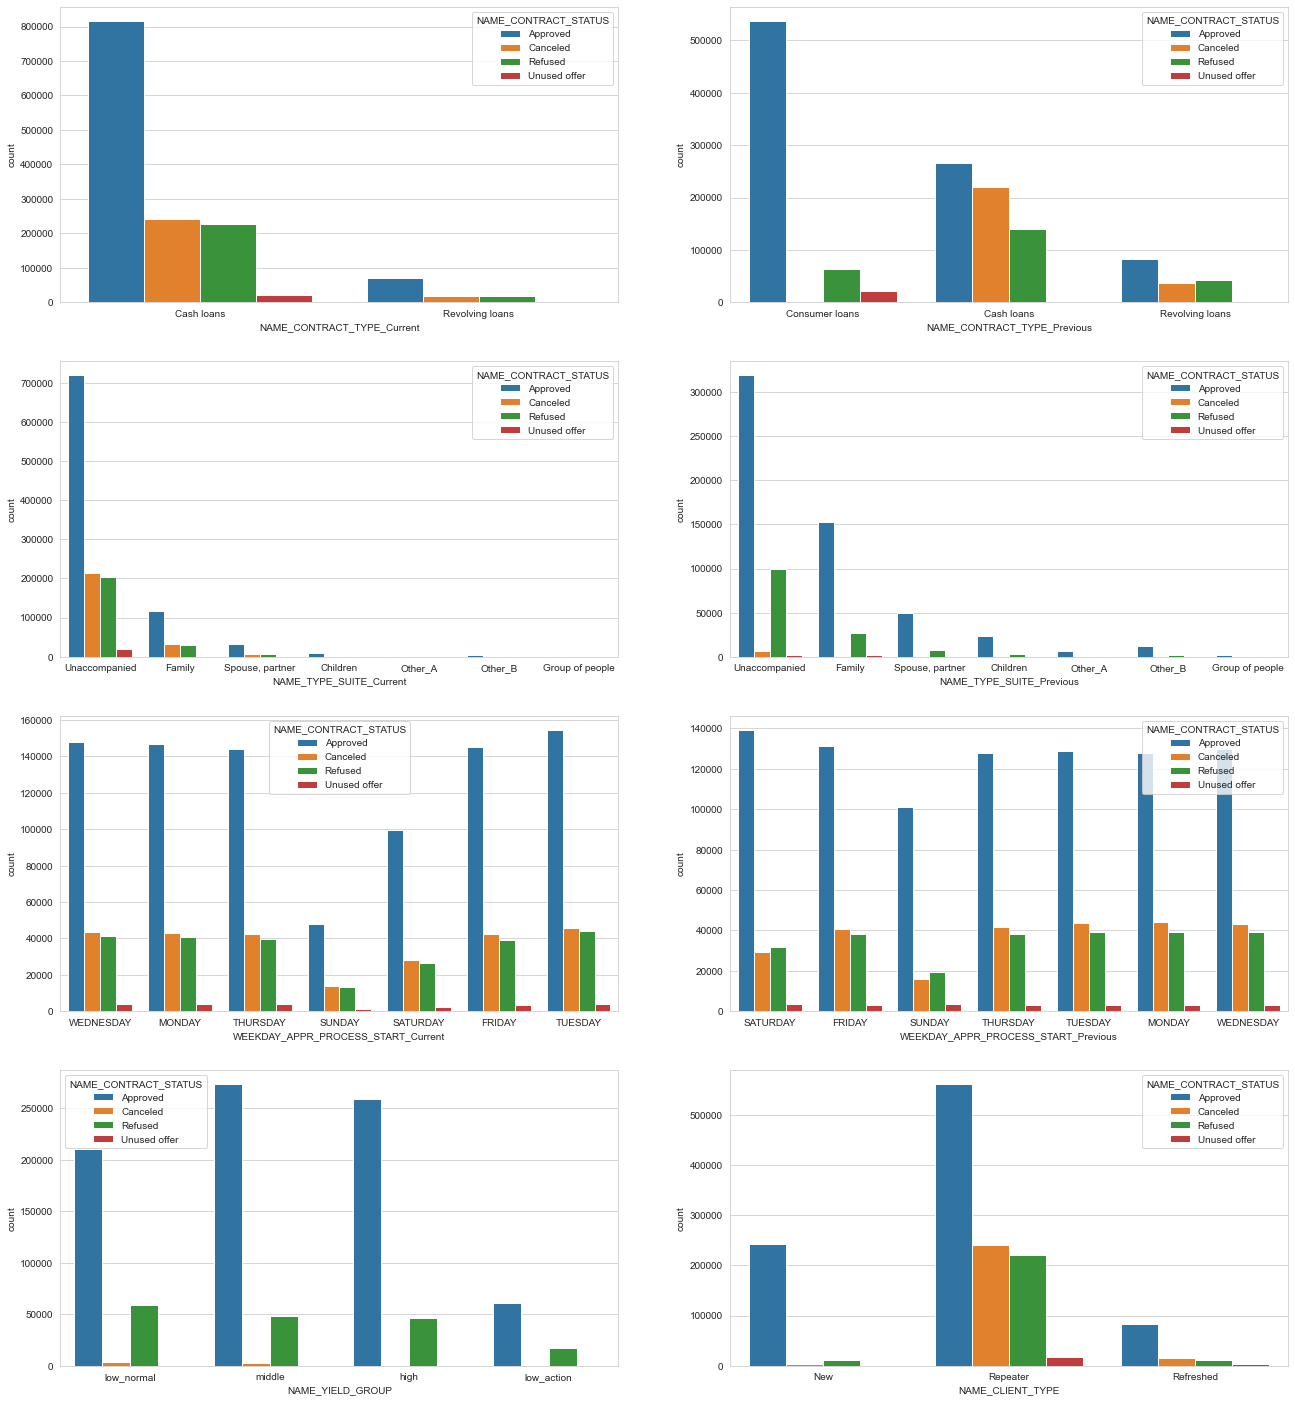

In [77]:
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                     'WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
                    'NAME_YIELD_GROUP','NAME_CLIENT_TYPE']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
plt.show()

- People with Medium total income are more likely to default.
- People with high Credit amount are less likely to default.
- Married people tend to take more Loan as compaired to other categories.
- Saturday and sunday are less busy for bank in terms of loan applications.
- People with house or appartment tend to take more loans.
- People with real estate tends to take more loans.
- People who don't own a car tends to take more loans.
- People tend to take more cash loans.

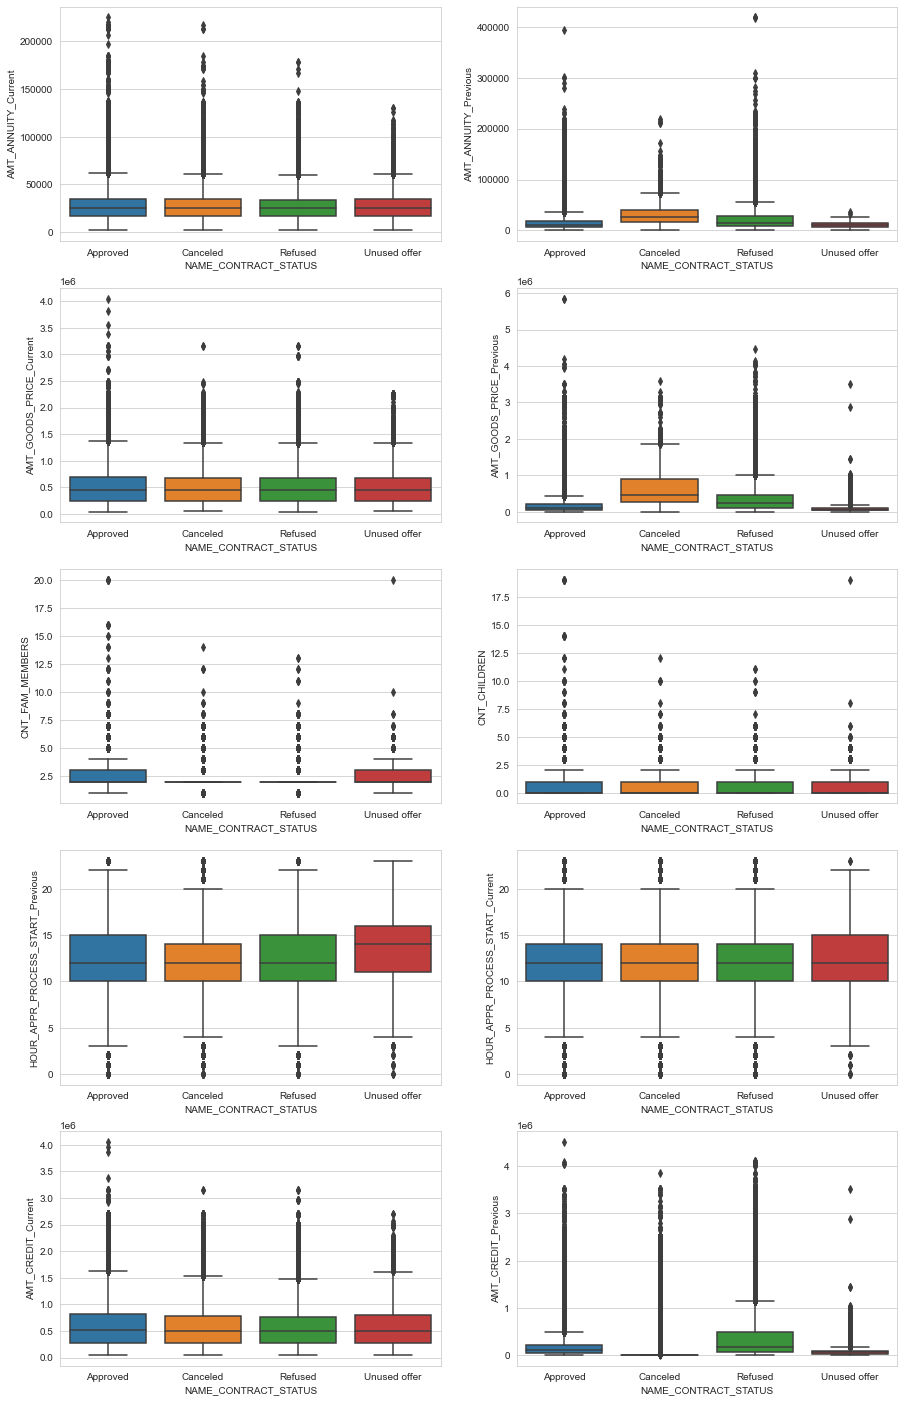

In [78]:
#Bi-variate continous plots
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
                   #'AMT_INCOME_TOTAL']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
plt.show() 

- AMT_CREDIT_Previous has highest refused cases and AMT_CREDIT_Current is similar for all 4 cases.
- Nuclear family(2-3 people in family) get highest approval.
- Previously most of the applications were cancelled or refused but now all  similar situation for AMT_ANNUITY.
- Time spent in unused offer is higher as compared to other categories.

### Major variables to consider for loan prediction: